# FE_MINI_PROJECT , Group : Py-efficient
# Topic - WEB SCRAPPING OF FAST MOVING CONSUMER GOOD FMCG

# (A)Data Acquisition - 
#Web scraping a web page involves fetching it and extracting from it. Fetching is the downloading of a page (which a browser does when you view the page).  Once fetched, then extraction can take place. The content of a page may be parsed, searched, reformatted, its data copied into a spreadsheet, and so on
We used the following steps for scrapping data:-
#	URL of the E-commerce site identified for webscraping
#	Identifying the data points required
#	Inspecting the webpage
#	Write the code for scrapping data
#	Run the code and extract data
#	Store the data in Required format 
#We used following sites for scrapping data:-
#	https://www.jiomart.com/category/fruits-vegetables/fresh-vegetables
#	https://www.jiomart.com/category/fruits-vegetables/fresh-fruits
#	https://www.jiomart.com/category/dairy-bakery/dairy
#	https://www.jiomart.com/category/staples/dry-fruits
#	https://www.dmart.in/dmart-grocery-1
#	https://www.jiomart.com/category/staples/dals-pulses
#	https://www.bigbasket.com/cl/fruits-vegetables

# Data Acquisition - Starts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

url ="https://www.jiomart.com/category/fruits-vegetables/fresh-vegetables"

html_content = requests.get(url).text
# Parse the html content
soup = BeautifulSoup(html_content, "lxml")
#Get the title
title = soup.title
print(title)

<title>Fresh Vegetables - JioMart</title>


In [2]:
print(soup.prettify()) # print the parsed data of html

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <title>
   Fresh Vegetables - JioMart
  </title>
  <meta charset="utf-8"/>
  <meta content="INDEX,FOLLOW" name="robots"/>
  <meta content="Buy Grocery Online in Mumbai, Pune, Bangalore at Reliance Smart online grocery store. Best price on fresh fruits &amp; vegetables, dairy &amp; bakery, packaged food." name="description"/>
  <meta content="" name="keywords"/>
  <meta content="width=device-width, height=device-height, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/>
  <meta content="JioMart" property="og:site_name"/>
  <meta content="website" property="og:type"/>
  <meta content="Fresh Vegetables - JioMart" property="og:title"/>
  <meta content="Buy Grocery Online in Mumbai, Pune, Bangalore at Reliance Smart online grocery store. Best price on fresh fruits &amp; vegetables, dairy &amp; bakery, packaged food." property="og:description"/>
  <meta content="https://www.jiomart.com/category/fruits-vegetables/fresh-vegeta

# Relience Fresh - Vegetables

In [3]:
products=[] #List to store name of the product
prices=[] #List to store price of the product

list = soup.findAll("span", {"class":"clsgetname"}) 
for name in list:
    products.append(name.get_text())
   # print(name.get_text())
        
df = pd.DataFrame({'RelVegetables':products}) 
#df.head(17)
list1 = soup.findAll("span",{"id":"final_price"})
for fprice in list1:
    prices.append(fprice.get_text())
df1 = pd.DataFrame({'RVegPrices':prices})
#df1.head(17)

In [4]:
#Relience Vegetable
horizontal_stack = pd.concat([df, df1], axis=1)
horizontal_stack.head()

,RelVegetables,RVegPrices
0,Cucumber 1 kg,₹ 36.00
1,Green Capsicum 500 g,₹ 24.00
2,Lauki (Bottle Gourd) 1 kg,₹ 29.00
3,Potato 1 kg (Pack),₹ 32.00
4,Cabbage 1 pc,₹ 11.00


# Relience Fresh - Fruits

In [5]:
url1 = "https://www.jiomart.com/category/fruits-vegetables/fresh-fruits"
html_content1 = requests.get(url1).text
# Parse the html content
psoup = BeautifulSoup(html_content1, "lxml")
#Get the title
title = psoup.title
print(title)

<title>Fresh Fruits - JioMart</title>


In [6]:
print(psoup.prettify()) # print the parsed data of html

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <title>
   Fresh Fruits - JioMart
  </title>
  <meta charset="utf-8"/>
  <meta content="INDEX,FOLLOW" name="robots"/>
  <meta content="Buy Grocery Online in Mumbai, Pune, Bangalore at Reliance Smart online grocery store. Best price on fresh fruits &amp; vegetables, dairy &amp; bakery, packaged food." name="description"/>
  <meta content="" name="keywords"/>
  <meta content="width=device-width, height=device-height, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/>
  <meta content="JioMart" property="og:site_name"/>
  <meta content="website" property="og:type"/>
  <meta content="Fresh Fruits - JioMart" property="og:title"/>
  <meta content="Buy Grocery Online in Mumbai, Pune, Bangalore at Reliance Smart online grocery store. Best price on fresh fruits &amp; vegetables, dairy &amp; bakery, packaged food." property="og:description"/>
  <meta content="https://www.jiomart.com/category/fruits-vegetables/fresh-fruits" proper

In [7]:
fruits=[] #List to store name of the product
fprices=[] #List to store price of the product

list = psoup.findAll("span", {"class":"clsgetname"}) 
for name in list:
    fruits.append(name.get_text())
 
        
fdf = pd.DataFrame({'RelFruits':fruits}) 
#fdf.head(17)
list1 = psoup.findAll("span",{"id":"final_price"})
for fprice in list1:
    fprices.append(fprice.get_text())
fdf1 = pd.DataFrame({'RFruitPrices':fprices})
#fdf1.head(17)

In [8]:
#Relience Fruits
horizontal_stack1 = pd.concat([fdf, fdf1], axis=1)
horizontal_stack1.head(17)

,RelFruits,RFruitPrices
0,Mango Banganapalli 1 kg,₹ 75.00
1,Mosambi 1 Kg,₹ 38.00
2,Banana Yellaki 1 kg,₹ 48.00
3,Mango Totapuri 1 kg,₹ 30.00
4,Apple Red Delicious USA 1 kg,₹ 169.00
5,Pineapple Queen 1 pc,₹ 25.00
6,Banana Robusta 1 kg,₹ 19.00
7,Banana Nendran 1 Kg,₹ 55.00
8,Kiwi Gold Zespri per Piece,₹ 30.00
9,Papaya Normal 1 kg,₹ 19.00


In [9]:
#res = {'Fresh Vegitables':horizontal_stack,'Fresh Fruits':horizontal_stack1}
res = [horizontal_stack, horizontal_stack1]
#res = pd.concat([horizontal_stack,horizontal_stack1], axis=1)
result = pd.concat(res, axis=1)
result

,RelVegetables,RVegPrices,RelFruits,RFruitPrices
0,Cucumber 1 kg,₹ 36.00,Mango Banganapalli 1 kg,₹ 75.00
1,Green Capsicum 500 g,₹ 24.00,Mosambi 1 Kg,₹ 38.00
2,Lauki (Bottle Gourd) 1 kg,₹ 29.00,Banana Yellaki 1 kg,₹ 48.00
3,Potato 1 kg (Pack),₹ 32.00,Mango Totapuri 1 kg,₹ 30.00
4,Cabbage 1 pc,₹ 11.00,Apple Red Delicious USA 1 kg,₹ 169.00
5,Onion Sambhar 1 kg,₹ 159.00,Pineapple Queen 1 pc,₹ 25.00
6,Onion White 1 kg,₹ 64.00,Banana Robusta 1 kg,₹ 19.00
7,Arbi (Colocasia) Small 1 kg,₹ 109.00,Banana Nendran 1 Kg,₹ 55.00
8,Beetroot 1 kg,₹ 40.00,Kiwi Gold Zespri per Piece,₹ 30.00
9,Carrot Regular 1 kg,₹ 30.00,Papaya Normal 1 kg,₹ 19.00


# Relience Fresh - Diary products

In [10]:
url2 = "https://www.jiomart.com/category/dairy-bakery/dairy"
html_content2 = requests.get(url2).text
# Parse the html content
psoup_diary = BeautifulSoup(html_content2, "lxml")
#Get the title
title = psoup_diary.title
print(title)

<title>Dairy - JioMart</title>


In [11]:
print(psoup_diary.prettify()) # print the parsed data of html

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <title>
   Dairy - JioMart
  </title>
  <meta charset="utf-8"/>
  <meta content="INDEX,FOLLOW" name="robots"/>
  <meta content="Buy Grocery Online in Mumbai, Pune, Bangalore at Reliance Smart online grocery store. Best price on fresh fruits &amp; vegetables, dairy &amp; bakery, packaged food." name="description"/>
  <meta content="" name="keywords"/>
  <meta content="width=device-width, height=device-height, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/>
  <meta content="JioMart" property="og:site_name"/>
  <meta content="website" property="og:type"/>
  <meta content="Dairy - JioMart" property="og:title"/>
  <meta content="Buy Grocery Online in Mumbai, Pune, Bangalore at Reliance Smart online grocery store. Best price on fresh fruits &amp; vegetables, dairy &amp; bakery, packaged food." property="og:description"/>
  <meta content="https://www.jiomart.com/category/dairy-bakery/dairy" property="og:url"/>
  <meta cont

In [12]:
diary=[] #List to store name of the product
dprices=[] #List to store price of the product

list = psoup_diary.findAll("span", {"class":"clsgetname"}) 
for name in list:
    diary.append(name.get_text())
 
        
ddf = pd.DataFrame({'RelDiary':diary}) 
#ddf.head(17)
list1 = psoup_diary.findAll("span",{"id":"final_price"})
for fprice in list1:
    dprices.append(fprice.get_text())
ddf1 = pd.DataFrame({'RDairyPrices':dprices})
#ddf1.head(17)

In [13]:
horizontal_stack3 = pd.concat([ddf, ddf1], axis=1)
horizontal_stack3.head(17)

,RelDiary,RDairyPrices
0,Nestle Everyday Dairy Whitener 400 g (Pouch),₹ 190.00
1,Amul Tru Orange Flavoured Milk 200 ml (Tetra Pak),₹ 9.50
2,Amul Masti Spiced Buttermilk 1 L (Tetra Pak),₹ 47.50
3,Amul Tru Mango Flavoured Milk 200 ml (Tetra Pak),₹ 9.50
4,Gowardhan Pure Cow Ghee 200 ml (Jar),₹ 142.50
5,Amul Tru Lychee Flavoured Milk 200 ml (Tetra Pak),₹ 9.50
6,Amul Tru Apple Flavoured Milk 200 ml (Tetra Pak),₹ 9.50
7,Cavin's Chocolate Milkshake 180 ml (Tetra Pak),₹ 27.00
8,Amul Pure Ghee 1 L (Tin),₹ 494.00
9,Morton Pure Ghee 500 ml (Jar),₹ 367.65


# Relience Fresh - Dry Fruits

In [14]:
url3 = "https://www.jiomart.com/category/staples/dry-fruits"
html_content3 = requests.get(url3).text
# Parse the html content
psoup_dry = BeautifulSoup(html_content3, "lxml")
#Get the title
title = psoup_dry.title
print(title)

<title>Dry Fruits - JioMart</title>


In [15]:
print(psoup_dry.prettify()) # print the parsed data of html

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <title>
   Dry Fruits - JioMart
  </title>
  <meta charset="utf-8"/>
  <meta content="INDEX,FOLLOW" name="robots"/>
  <meta content="Buy Grocery Online in Mumbai, Pune, Bangalore at Reliance Smart online grocery store. Best price on fresh fruits &amp; vegetables, dairy &amp; bakery, packaged food." name="description"/>
  <meta content="" name="keywords"/>
  <meta content="width=device-width, height=device-height, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/>
  <meta content="JioMart" property="og:site_name"/>
  <meta content="website" property="og:type"/>
  <meta content="Dry Fruits - JioMart" property="og:title"/>
  <meta content="Buy Grocery Online in Mumbai, Pune, Bangalore at Reliance Smart online grocery store. Best price on fresh fruits &amp; vegetables, dairy &amp; bakery, packaged food." property="og:description"/>
  <meta content="https://www.jiomart.com/category/staples/dry-fruits" property="og:url"/>
  

In [16]:
dry=[] #List to store name of the product
dryprices=[] #List to store price of the product

list2 = psoup_dry.findAll("span", {"class":"clsgetname"}) 
for name in list2:
    dry.append(name.get_text())
 
        
fdf_dry = pd.DataFrame({'RelDry_Fruits':dry}) 
#fdf_dry.head(17)
list2 = psoup_dry.findAll("span",{"id":"final_price"})
for fprice in list2:
    dryprices.append(fprice.get_text())
drydf1 = pd.DataFrame({'RDryFPrices':dryprices})
#drydf1.head(17)

In [17]:
horizontal_stack4 = pd.concat([fdf_dry, drydf1], axis=1)
horizontal_stack4.head(17)

,RelDry_Fruits,RDryFPrices
0,Good Life W320 Cashews 500 g,₹ 449.00
1,Good Life Almonds 500 g,₹ 395.00
2,Good Life Mixed Dry Fruits 500 g,₹ 289.00
3,Date Crown Fard Dates 500 g,₹ 186.00
4,Shree Value Pack Badam Plain 200 gm,₹ 179.00
5,Good Life Phool Makhana 100 g,₹ 109.00
6,Shree Value Pack Kaju Plain 200 gm,₹ 199.00


In [18]:
#Concatanate Dairy & Dry fruits
horizontal_stack5 = pd.concat([horizontal_stack3,horizontal_stack4], axis=1)
horizontal_stack5

,RelDiary,RDairyPrices,RelDry_Fruits,RDryFPrices
0,Nestle Everyday Dairy Whitener 400 g (Pouch),₹ 190.00,Good Life W320 Cashews 500 g,₹ 449.00
1,Amul Tru Orange Flavoured Milk 200 ml (Tetra Pak),₹ 9.50,Good Life Almonds 500 g,₹ 395.00
2,Amul Masti Spiced Buttermilk 1 L (Tetra Pak),₹ 47.50,Good Life Mixed Dry Fruits 500 g,₹ 289.00
3,Amul Tru Mango Flavoured Milk 200 ml (Tetra Pak),₹ 9.50,Date Crown Fard Dates 500 g,₹ 186.00
4,Gowardhan Pure Cow Ghee 200 ml (Jar),₹ 142.50,Shree Value Pack Badam Plain 200 gm,₹ 179.00
5,Amul Tru Lychee Flavoured Milk 200 ml (Tetra Pak),₹ 9.50,Good Life Phool Makhana 100 g,₹ 109.00
6,Amul Tru Apple Flavoured Milk 200 ml (Tetra Pak),₹ 9.50,Shree Value Pack Kaju Plain 200 gm,₹ 199.00
7,Cavin's Chocolate Milkshake 180 ml (Tetra Pak),₹ 27.00,NaN,NaN
8,Amul Pure Ghee 1 L (Tin),₹ 494.00,NaN,NaN
9,Morton Pure Ghee 500 ml (Jar),₹ 367.65,NaN,NaN


# Relience Fresh - single dataset 

In [19]:
#Relience Fresh- Fruits & Vegetables | Dairy & Dry fruits
horizontal_stack6 = pd.concat([result,horizontal_stack5], axis=1)
horizontal_stack6

,RelVegetables,RVegPrices,RelFruits,RFruitPrices,RelDiary,RDairyPrices,RelDry_Fruits,RDryFPrices
0,Cucumber 1 kg,₹ 36.00,Mango Banganapalli 1 kg,₹ 75.00,Nestle Everyday Dairy Whitener 400 g (Pouch),₹ 190.00,Good Life W320 Cashews 500 g,₹ 449.00
1,Green Capsicum 500 g,₹ 24.00,Mosambi 1 Kg,₹ 38.00,Amul Tru Orange Flavoured Milk 200 ml (Tetra Pak),₹ 9.50,Good Life Almonds 500 g,₹ 395.00
2,Lauki (Bottle Gourd) 1 kg,₹ 29.00,Banana Yellaki 1 kg,₹ 48.00,Amul Masti Spiced Buttermilk 1 L (Tetra Pak),₹ 47.50,Good Life Mixed Dry Fruits 500 g,₹ 289.00
3,Potato 1 kg (Pack),₹ 32.00,Mango Totapuri 1 kg,₹ 30.00,Amul Tru Mango Flavoured Milk 200 ml (Tetra Pak),₹ 9.50,Date Crown Fard Dates 500 g,₹ 186.00
4,Cabbage 1 pc,₹ 11.00,Apple Red Delicious USA 1 kg,₹ 169.00,Gowardhan Pure Cow Ghee 200 ml (Jar),₹ 142.50,Shree Value Pack Badam Plain 200 gm,₹ 179.00
5,Onion Sambhar 1 kg,₹ 159.00,Pineapple Queen 1 pc,₹ 25.00,Amul Tru Lychee Flavoured Milk 200 ml (Tetra Pak),₹ 9.50,Good Life Phool Makhana 100 g,₹ 109.00
6,Onion White 1 kg,₹ 64.00,Banana Robusta 1 kg,₹ 19.00,Amul Tru Apple Flavoured Milk 200 ml (Tetra Pak),₹ 9.50,Shree Value Pack Kaju Plain 200 gm,₹ 199.00
7,Arbi (Colocasia) Small 1 kg,₹ 109.00,Banana Nendran 1 Kg,₹ 55.00,Cavin's Chocolate Milkshake 180 ml (Tetra Pak),₹ 27.00,NaN,NaN
8,Beetroot 1 kg,₹ 40.00,Kiwi Gold Zespri per Piece,₹ 30.00,Amul Pure Ghee 1 L (Tin),₹ 494.00,NaN,NaN
9,Carrot Regular 1 kg,₹ 30.00,Papaya Normal 1 kg,₹ 19.00,Morton Pure Ghee 500 ml (Jar),₹ 367.65,NaN,NaN


# D-MART - Food

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

url6 ="https://www.dmart.in/dmart-grocery-1"

html_content6 = requests.get(url6).text
# Parse the html content
soup_D_GRO = BeautifulSoup(html_content6, "lxml")
#Get the title
title = soup_D_GRO.title
print(title)

<title> DMart Grocery : Buy DMart Grocery Online @ Best Price | DMart - Daily Discounts Daily Savings - DMart </title>


In [21]:
print(soup_D_GRO.prettify()) # print the parsed data of html

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   DMart Grocery : Buy DMart Grocery Online @ Best Price | DMart - Daily Discounts Daily Savings - DMart
  </title>
  <meta content="" name="key"/>
  <meta content="" name="description"/>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/>
  <link href="https://fonts.googleapis.com/css?family=Open+Sans:400,600" rel="stylesheet" type="text/css"/>
  <link href="https://content.dmart.in/rwd/202005081423/css/min-main.css" media="all" rel="stylesheet"/>
  <link href="https://content.dmart.in/rwd/202005081423/css/min-dhp.css" media="all" rel="stylesheet"/>
  <link href="https://content.dmart.in/rwd/202005081423/css/min-PUP-information.css" media="all" rel="stylesheet"/>
  <link href="https://content.dmart.in/rwd/202005081423/css/min-responsive.css" media="all" rel="stylesheet"/>
  <link href="

In [22]:
D_GRO=[] #List to store name of the product
D_GRO_prices=[] #List to store price of the product

list = soup_D_GRO.findAll("div", {"class":"col-xs-12 col-md-4 col-lg-3 js-switch-view"})
for name in list:
    try:
        #prod = name.find('div', {'class': "col-xs-12 col-md-4 col-lg-3 js-switch-view"})
        #print("prod is...", prod)
        prod = name.find('a')
        price = name.find('div',{'class':"product-listing-details"})
        price = price.find('p',{'class':"product-listing--original-price"})
        price = price.find('span',{'class':"strike-diagonal"})
        D_GRO.append(prod['href'])
        D_GRO_prices.append(price.text)
    except Exception as e:
        pass
   
        
df_D_GRO = pd.DataFrame({'DmartProduct':D_GRO, "DProductPrices":D_GRO_prices}) 
df_D_GRO.head(200)

,DmartProduct,DProductPrices
0,/tur-dal-latur,\n121.00\r\n
1,/moong--dal,\n169.00\r\n
2,/tur-dal-premium-gujarat,\n145.00\r\n
3,/moong-whole,\n94.00\r\n
4,/premia-groundnut,\n94.00\r\n
5,/chana--dal,\n81.00\r\n
6,/udid-dal,\n88.00\r\n
7,/masoor--dal,\n112.00\r\n
8,/moong-dal-chilti,\n90.00\r\n
9,/chana-small,\n44.00\r\n


# JIO-MART

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

url8 ="https://www.jiomart.com/category/staples/dals-pulses"

html_content8 = requests.get(url8).text
# Parse the html content
soup_dal_pul = BeautifulSoup(html_content8, "lxml")
#Get the title
title = soup_dal_pul.title
print(title)

<title>Dals &amp; Pulses - JioMart</title>


In [24]:
print(soup_dal_pul.prettify()) # print the parsed data of html

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <title>
   Dals &amp; Pulses - JioMart
  </title>
  <meta charset="utf-8"/>
  <meta content="INDEX,FOLLOW" name="robots"/>
  <meta content="Buy Grocery Online in Mumbai, Pune, Bangalore at Reliance Smart online grocery store. Best price on fresh fruits &amp; vegetables, dairy &amp; bakery, packaged food." name="description"/>
  <meta content="" name="keywords"/>
  <meta content="width=device-width, height=device-height, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/>
  <meta content="JioMart" property="og:site_name"/>
  <meta content="website" property="og:type"/>
  <meta content="Dals &amp; Pulses - JioMart" property="og:title"/>
  <meta content="Buy Grocery Online in Mumbai, Pune, Bangalore at Reliance Smart online grocery store. Best price on fresh fruits &amp; vegetables, dairy &amp; bakery, packaged food." property="og:description"/>
  <meta content="https://www.jiomart.com/category/staples/dals-pulses" propert

In [25]:
products=[] #List to store name of the product
prices=[] #List to store price of the product

list = soup_dal_pul.findAll("div", {"class":"col-md-3 p-0"}) 
for name in list:
    
    prod = name.find('div', {'class': "cat-item"})
    prod = name.find('a',{'class':"category_name"})
    products.append(prod['title'])
#     print(tt['title'])
    price = name.find('span',{'class':"price-box"})
    price = price.find('span',{'id':"final_price"}).text
    
    prices.append(price)
        
df = pd.DataFrame({'JioProduct':products, "JProductPrice":prices}) 
df.head(20)

,JioProduct,JProductPrice
0,Good Life Tur Dal 1 kg,₹ 106.00
1,Pick N Cook Raw Peanuts / Singdhana 500 g,₹ 95.00
2,Loose Toor Dal Value 1 kg,₹ 91.00
3,Pick N Cook Premium Moong Dal 1 kg,₹ 180.00
4,Moong Dal 2 kg,₹ 260.00
5,Good Life Urad Dal Chilka 500 g,₹ 68.00
6,Pick N Cook Maha Toor Dal 1 kg,₹ 120.00
7,Tata Sampann High Protein Unpolished Tur / Arh...,₹ 129.00
8,Pick N Cook Masoor Dal 500 g,₹ 63.00
9,Good Life Roasted Chana Dal / Bengal Gram 200 g,₹ 22.00


# Data Acquisition - Ends

# (B)	DATA CLEANING
# Cleaning - DMart - Product prices Strip special characters and  convert float
# Cleaning - Jio Mart - Count Duplicate rows and removed the duplicates
# Cleaning - Relience Fresh - Replace string type Nan from respective column product name - Nan to None .  Replace integer/float type Nan from column product Price - Nan to 0

# DATA CLEANING - Starts

In [26]:
#DMart - Food dataset - Cleaning
df_D_GRO['DmartProduct'] = df_D_GRO['DmartProduct'].str.lstrip()
df_D_GRO['DProductPrices'] = (df_D_GRO['DProductPrices'].str.strip('\n').astype(float))
print(len(df_D_GRO))
df_D_GRO


33


,DmartProduct,DProductPrices
0,/tur-dal-latur,121.0
1,/moong--dal,169.0
2,/tur-dal-premium-gujarat,145.0
3,/moong-whole,94.0
4,/premia-groundnut,94.0
5,/chana--dal,81.0
6,/udid-dal,88.0
7,/masoor--dal,112.0
8,/moong-dal-chilti,90.0
9,/chana-small,44.0


In [27]:
#Jio-Mart- Food dataset - Cleaning

# Rows containing duplicate data
duplicate_rows_dt = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_dt.shape)
# Used to count the number of rows before removing the data
df.count() 
# Dropping the duplicates 
df = df.drop_duplicates()
print(len(df))
df.dtypes
df

Number of duplicate rows:  (0, 2)
20


,JioProduct,JProductPrice
0,Good Life Tur Dal 1 kg,₹ 106.00
1,Pick N Cook Raw Peanuts / Singdhana 500 g,₹ 95.00
2,Loose Toor Dal Value 1 kg,₹ 91.00
3,Pick N Cook Premium Moong Dal 1 kg,₹ 180.00
4,Moong Dal 2 kg,₹ 260.00
5,Good Life Urad Dal Chilka 500 g,₹ 68.00
6,Pick N Cook Maha Toor Dal 1 kg,₹ 120.00
7,Tata Sampann High Protein Unpolished Tur / Arh...,₹ 129.00
8,Pick N Cook Masoor Dal 500 g,₹ 63.00
9,Good Life Roasted Chana Dal / Bengal Gram 200 g,₹ 22.00


In [28]:
# Relience Fresh - Food dataset - Cleaning
print(len(horizontal_stack6))
horizontal_stack6['RelVegetables'] = horizontal_stack6['RelVegetables'].str.strip()
horizontal_stack6['RelFruits'] = horizontal_stack6['RelFruits'].str.strip()
horizontal_stack6['RelDiary'] = horizontal_stack6['RelDiary'].str.strip()
horizontal_stack6['RelDry_Fruits'] = horizontal_stack6['RelDry_Fruits'].str.strip()
horizontal_stack6['RVegPrices'] = horizontal_stack6['RVegPrices'].replace(np.nan, 0)
horizontal_stack6['RFruitPrices'] = horizontal_stack6['RFruitPrices'].replace(np.nan, 0)
horizontal_stack6['RDryFPrices'] = horizontal_stack6['RDryFPrices'].replace(np.nan, 0)
horizontal_stack6['RelFruits'] = horizontal_stack6['RelFruits'].replace(np.nan, 'None')
horizontal_stack6['RelVegetables'] = horizontal_stack6['RelVegetables'].replace(np.nan, 'None')
horizontal_stack6['RelDry_Fruits'] = horizontal_stack6['RelDry_Fruits'].replace(np.nan, 'None')
horizontal_stack6

20


,RelVegetables,RVegPrices,RelFruits,RFruitPrices,RelDiary,RDairyPrices,RelDry_Fruits,RDryFPrices
0,Cucumber 1 kg,₹ 36.00,Mango Banganapalli 1 kg,₹ 75.00,Nestle Everyday Dairy Whitener 400 g (Pouch),₹ 190.00,Good Life W320 Cashews 500 g,₹ 449.00
1,Green Capsicum 500 g,₹ 24.00,Mosambi 1 Kg,₹ 38.00,Amul Tru Orange Flavoured Milk 200 ml (Tetra Pak),₹ 9.50,Good Life Almonds 500 g,₹ 395.00
2,Lauki (Bottle Gourd) 1 kg,₹ 29.00,Banana Yellaki 1 kg,₹ 48.00,Amul Masti Spiced Buttermilk 1 L (Tetra Pak),₹ 47.50,Good Life Mixed Dry Fruits 500 g,₹ 289.00
3,Potato 1 kg (Pack),₹ 32.00,Mango Totapuri 1 kg,₹ 30.00,Amul Tru Mango Flavoured Milk 200 ml (Tetra Pak),₹ 9.50,Date Crown Fard Dates 500 g,₹ 186.00
4,Cabbage 1 pc,₹ 11.00,Apple Red Delicious USA 1 kg,₹ 169.00,Gowardhan Pure Cow Ghee 200 ml (Jar),₹ 142.50,Shree Value Pack Badam Plain 200 gm,₹ 179.00
5,Onion Sambhar 1 kg,₹ 159.00,Pineapple Queen 1 pc,₹ 25.00,Amul Tru Lychee Flavoured Milk 200 ml (Tetra Pak),₹ 9.50,Good Life Phool Makhana 100 g,₹ 109.00
6,Onion White 1 kg,₹ 64.00,Banana Robusta 1 kg,₹ 19.00,Amul Tru Apple Flavoured Milk 200 ml (Tetra Pak),₹ 9.50,Shree Value Pack Kaju Plain 200 gm,₹ 199.00
7,Arbi (Colocasia) Small 1 kg,₹ 109.00,Banana Nendran 1 Kg,₹ 55.00,Cavin's Chocolate Milkshake 180 ml (Tetra Pak),₹ 27.00,None,0
8,Beetroot 1 kg,₹ 40.00,Kiwi Gold Zespri per Piece,₹ 30.00,Amul Pure Ghee 1 L (Tin),₹ 494.00,None,0
9,Carrot Regular 1 kg,₹ 30.00,Papaya Normal 1 kg,₹ 19.00,Morton Pure Ghee 500 ml (Jar),₹ 367.65,None,0


# DATA CLEANING - Ends

# (C) - DATA INTEGRATION 
# To store the data in csv file
# To send each dataset to seperate three 
# To read each file and display the file data
# To concatanate all three files into single schema dataset and send that single schema to final FMCG .csv file.
# All gets automatically saved to local system mainly to Download folder. We can search by file name too in the local system

# DATA INTEGRATION - Starts

#  Store each dataset of the to sepearet CSV file

In [29]:

#Send RelienceFresh Foods scrapped dataset to csv file
horizontal_stack6.to_csv('RelienceFreshFoods.csv', index=False, encoding='utf-8')
#Send DMart Food scrapped dataset to csv file
df_D_GRO.to_csv('DmartFoodProducts.csv', index=False, encoding='utf-8')
#Send Jio Food Scrapped dataset to csv file
df.to_csv('JioFoodProducts.csv', index=False, encoding='utf-8')


#  Read 3 stored csv files

In [30]:
#Read 3 fiels and make a single schema Dataset 
Rdata = pd.read_csv('RelienceFreshFoods.csv')
Ddata = pd.read_csv('DmartFoodProducts.csv')
Jdata = pd.read_csv('JioFoodProducts.csv')

# Diplay the stored data from three .CSV files

In [31]:
#'RelienceFreshFoods.csv'
Rdata.head()

,RelVegetables,RVegPrices,RelFruits,RFruitPrices,RelDiary,RDairyPrices,RelDry_Fruits,RDryFPrices
0,Cucumber 1 kg,₹ 36.00,Mango Banganapalli 1 kg,₹ 75.00,Nestle Everyday Dairy Whitener 400 g (Pouch),₹ 190.00,Good Life W320 Cashews 500 g,₹ 449.00
1,Green Capsicum 500 g,₹ 24.00,Mosambi 1 Kg,₹ 38.00,Amul Tru Orange Flavoured Milk 200 ml (Tetra Pak),₹ 9.50,Good Life Almonds 500 g,₹ 395.00
2,Lauki (Bottle Gourd) 1 kg,₹ 29.00,Banana Yellaki 1 kg,₹ 48.00,Amul Masti Spiced Buttermilk 1 L (Tetra Pak),₹ 47.50,Good Life Mixed Dry Fruits 500 g,₹ 289.00
3,Potato 1 kg (Pack),₹ 32.00,Mango Totapuri 1 kg,₹ 30.00,Amul Tru Mango Flavoured Milk 200 ml (Tetra Pak),₹ 9.50,Date Crown Fard Dates 500 g,₹ 186.00
4,Cabbage 1 pc,₹ 11.00,Apple Red Delicious USA 1 kg,₹ 169.00,Gowardhan Pure Cow Ghee 200 ml (Jar),₹ 142.50,Shree Value Pack Badam Plain 200 gm,₹ 179.00


In [32]:
#DmartFoodProducts.csv
Ddata.head()

,DmartProduct,DProductPrices
0,/tur-dal-latur,121.0
1,/moong--dal,169.0
2,/tur-dal-premium-gujarat,145.0
3,/moong-whole,94.0
4,/premia-groundnut,94.0


In [33]:
#JioFoodProducts.csv
Jdata.head()

,JioProduct,JProductPrice
0,Good Life Tur Dal 1 kg,₹ 106.00
1,Pick N Cook Raw Peanuts / Singdhana 500 g,₹ 95.00
2,Loose Toor Dal Value 1 kg,₹ 91.00
3,Pick N Cook Premium Moong Dal 1 kg,₹ 180.00
4,Moong Dal 2 kg,₹ 260.00


# Make a single dataset by concatanating 3 csv dataset into single dataset.

In [34]:
#Make a single dataset merging 3 csv data
fdata = pd.concat([Ddata,Jdata], axis=1)
finaldata = pd.concat([fdata,Rdata], axis=1)
finaldata

,DmartProduct,DProductPrices,JioProduct,JProductPrice,RelVegetables,RVegPrices,RelFruits,RFruitPrices,RelDiary,RDairyPrices,RelDry_Fruits,RDryFPrices
0,/tur-dal-latur,121.0,Good Life Tur Dal 1 kg,₹ 106.00,Cucumber 1 kg,₹ 36.00,Mango Banganapalli 1 kg,₹ 75.00,Nestle Everyday Dairy Whitener 400 g (Pouch),₹ 190.00,Good Life W320 Cashews 500 g,₹ 449.00
1,/moong--dal,169.0,Pick N Cook Raw Peanuts / Singdhana 500 g,₹ 95.00,Green Capsicum 500 g,₹ 24.00,Mosambi 1 Kg,₹ 38.00,Amul Tru Orange Flavoured Milk 200 ml (Tetra Pak),₹ 9.50,Good Life Almonds 500 g,₹ 395.00
2,/tur-dal-premium-gujarat,145.0,Loose Toor Dal Value 1 kg,₹ 91.00,Lauki (Bottle Gourd) 1 kg,₹ 29.00,Banana Yellaki 1 kg,₹ 48.00,Amul Masti Spiced Buttermilk 1 L (Tetra Pak),₹ 47.50,Good Life Mixed Dry Fruits 500 g,₹ 289.00
3,/moong-whole,94.0,Pick N Cook Premium Moong Dal 1 kg,₹ 180.00,Potato 1 kg (Pack),₹ 32.00,Mango Totapuri 1 kg,₹ 30.00,Amul Tru Mango Flavoured Milk 200 ml (Tetra Pak),₹ 9.50,Date Crown Fard Dates 500 g,₹ 186.00
4,/premia-groundnut,94.0,Moong Dal 2 kg,₹ 260.00,Cabbage 1 pc,₹ 11.00,Apple Red Delicious USA 1 kg,₹ 169.00,Gowardhan Pure Cow Ghee 200 ml (Jar),₹ 142.50,Shree Value Pack Badam Plain 200 gm,₹ 179.00
5,/chana--dal,81.0,Good Life Urad Dal Chilka 500 g,₹ 68.00,Onion Sambhar 1 kg,₹ 159.00,Pineapple Queen 1 pc,₹ 25.00,Amul Tru Lychee Flavoured Milk 200 ml (Tetra Pak),₹ 9.50,Good Life Phool Makhana 100 g,₹ 109.00
6,/udid-dal,88.0,Pick N Cook Maha Toor Dal 1 kg,₹ 120.00,Onion White 1 kg,₹ 64.00,Banana Robusta 1 kg,₹ 19.00,Amul Tru Apple Flavoured Milk 200 ml (Tetra Pak),₹ 9.50,Shree Value Pack Kaju Plain 200 gm,₹ 199.00
7,/masoor--dal,112.0,Tata Sampann High Protein Unpolished Tur / Arh...,₹ 129.00,Arbi (Colocasia) Small 1 kg,₹ 109.00,Banana Nendran 1 Kg,₹ 55.00,Cavin's Chocolate Milkshake 180 ml (Tetra Pak),₹ 27.00,None,0
8,/moong-dal-chilti,90.0,Pick N Cook Masoor Dal 500 g,₹ 63.00,Beetroot 1 kg,₹ 40.00,Kiwi Gold Zespri per Piece,₹ 30.00,Amul Pure Ghee 1 L (Tin),₹ 494.00,None,0
9,/chana-small,44.0,Good Life Roasted Chana Dal / Bengal Gram 200 g,₹ 22.00,Carrot Regular 1 kg,₹ 30.00,Papaya Normal 1 kg,₹ 19.00,Morton Pure Ghee 500 ml (Jar),₹ 367.65,None,0


# Store the finaldata  in FinalFMGCProducts.csv. 

In [35]:
#Send Final list of 3 csv dataset to Final schema csv file
finaldata.to_csv('FinalFMGCProducts.csv', index=False, encoding='utf-8')

# DATA INTEGRATION - Ends

# (D)EXPLORATORY DATA ANALYSIS AND RECOMMENDATION(EDA)
# To read the final file with all data
# To count, shape, remove duplicates, drop missing values, rename columns names, detecting outliers, box plot outliers
# To get correleation
# To plot heatmap
# To plot scattermap
# To plot bar chart on number of count of relience products & Jio products

# EDA - Starts

In [36]:
#Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format
import warnings
import math
import scipy.stats as stats
import scipy
from sklearn.preprocessing import scale
warnings.filterwarnings('ignore')

# EDA - Reading data from final csv file i.e 'FinalFMGCProducts.csv'

In [37]:
#Reading data
df_EDA = pd.read_csv("FinalFMGCProducts.csv")
df_EDA.head()

,DmartProduct,DProductPrices,JioProduct,JProductPrice,RelVegetables,RVegPrices,RelFruits,RFruitPrices,RelDiary,RDairyPrices,RelDry_Fruits,RDryFPrices
0,/tur-dal-latur,121.00000,Good Life Tur Dal 1 kg,₹ 106.00,Cucumber 1 kg,₹ 36.00,Mango Banganapalli 1 kg,₹ 75.00,Nestle Everyday Dairy Whitener 400 g (Pouch),₹ 190.00,Good Life W320 Cashews 500 g,₹ 449.00
1,/moong--dal,169.00000,Pick N Cook Raw Peanuts / Singdhana 500 g,₹ 95.00,Green Capsicum 500 g,₹ 24.00,Mosambi 1 Kg,₹ 38.00,Amul Tru Orange Flavoured Milk 200 ml (Tetra Pak),₹ 9.50,Good Life Almonds 500 g,₹ 395.00
2,/tur-dal-premium-gujarat,145.00000,Loose Toor Dal Value 1 kg,₹ 91.00,Lauki (Bottle Gourd) 1 kg,₹ 29.00,Banana Yellaki 1 kg,₹ 48.00,Amul Masti Spiced Buttermilk 1 L (Tetra Pak),₹ 47.50,Good Life Mixed Dry Fruits 500 g,₹ 289.00
3,/moong-whole,94.00000,Pick N Cook Premium Moong Dal 1 kg,₹ 180.00,Potato 1 kg (Pack),₹ 32.00,Mango Totapuri 1 kg,₹ 30.00,Amul Tru Mango Flavoured Milk 200 ml (Tetra Pak),₹ 9.50,Date Crown Fard Dates 500 g,₹ 186.00
4,/premia-groundnut,94.00000,Moong Dal 2 kg,₹ 260.00,Cabbage 1 pc,₹ 11.00,Apple Red Delicious USA 1 kg,₹ 169.00,Gowardhan Pure Cow Ghee 200 ml (Jar),₹ 142.50,Shree Value Pack Badam Plain 200 gm,₹ 179.00


In [38]:
#Checking missing values
df_EDA.isnull().sum()
# To display the top 80 rows
df_EDA.head(80)
# To display the bottom 80 rows
df_EDA.tail(80) 
#Checking the data types
df_EDA.dtypes
# Dropping irrelevant columns
df = df_EDA.drop(['DmartProduct','JioProduct','RelVegetables','RelFruits','RelDiary','RelDry_Fruits'],axis=1)
# Renaming the column names
df = df.rename(columns={"DProductPrices": "DM_Prc", "JProductPrice": "Ji_Prc", "RVegPrices": "RFVeg_Prc", "RFruitPrices":"RelFr_Prc","RDairyPrices":"RelD_Prc","RDryFPrices":"RelDF_Prcs"})
# Total number of rows and columns
df.shape
# Rows containing duplicate data
duplicate_rows_dt = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_dt.shape)
# Used to count the number of rows before removing the data
df.count() 
# Dropping the duplicates 
df = df.drop_duplicates()
# Counting the number of rows after removing duplicates.
df.count()
# Finding the null values.
print(df.isnull().sum())
# Dropping the missing values.
df = df.dropna() 
df.count()
df

Number of duplicate rows:  (0, 6)
DM_Prc         0
Ji_Prc        13
RFVeg_Prc     13
RelFr_Prc     13
RelD_Prc      13
RelDF_Prcs    13
dtype: int64


,DM_Prc,Ji_Prc,RFVeg_Prc,RelFr_Prc,RelD_Prc,RelDF_Prcs
0,121.00000,₹ 106.00,₹ 36.00,₹ 75.00,₹ 190.00,₹ 449.00
1,169.00000,₹ 95.00,₹ 24.00,₹ 38.00,₹ 9.50,₹ 395.00
2,145.00000,₹ 91.00,₹ 29.00,₹ 48.00,₹ 47.50,₹ 289.00
3,94.00000,₹ 180.00,₹ 32.00,₹ 30.00,₹ 9.50,₹ 186.00
4,94.00000,₹ 260.00,₹ 11.00,₹ 169.00,₹ 142.50,₹ 179.00
5,81.00000,₹ 68.00,₹ 159.00,₹ 25.00,₹ 9.50,₹ 109.00
6,88.00000,₹ 120.00,₹ 64.00,₹ 19.00,₹ 9.50,₹ 199.00
7,112.00000,₹ 129.00,₹ 109.00,₹ 55.00,₹ 27.00,0
8,90.00000,₹ 63.00,₹ 40.00,₹ 30.00,₹ 494.00,0
9,44.00000,₹ 22.00,₹ 30.00,₹ 19.00,₹ 367.65,0


# EDA - Outliers - BoxPlot

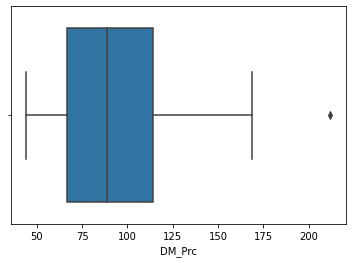

In [39]:
df['DM_Prc'] = pd.to_numeric(df['DM_Prc'])
#Detecting Outliers
sns.boxplot(x=df['DM_Prc'])

# Exploratory data analysis - Correleation
# Heatmap

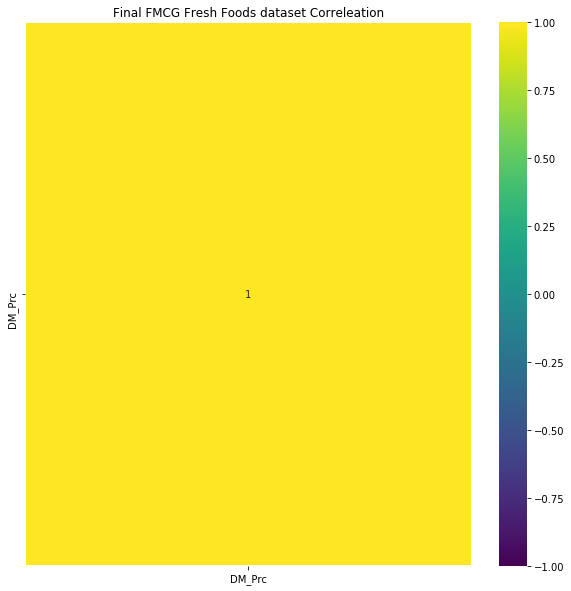

In [40]:
#Exploratory data analysis - Correleation
df_kor = df.corr()
plt.figure(figsize=(10,10))
plt.title('Final FMCG Fresh Foods dataset Correleation')
sns.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

In [41]:
print(len(df_EDA))
df_EDA

33


,DmartProduct,DProductPrices,JioProduct,JProductPrice,RelVegetables,RVegPrices,RelFruits,RFruitPrices,RelDiary,RDairyPrices,RelDry_Fruits,RDryFPrices
0,/tur-dal-latur,121.00000,Good Life Tur Dal 1 kg,₹ 106.00,Cucumber 1 kg,₹ 36.00,Mango Banganapalli 1 kg,₹ 75.00,Nestle Everyday Dairy Whitener 400 g (Pouch),₹ 190.00,Good Life W320 Cashews 500 g,₹ 449.00
1,/moong--dal,169.00000,Pick N Cook Raw Peanuts / Singdhana 500 g,₹ 95.00,Green Capsicum 500 g,₹ 24.00,Mosambi 1 Kg,₹ 38.00,Amul Tru Orange Flavoured Milk 200 ml (Tetra Pak),₹ 9.50,Good Life Almonds 500 g,₹ 395.00
2,/tur-dal-premium-gujarat,145.00000,Loose Toor Dal Value 1 kg,₹ 91.00,Lauki (Bottle Gourd) 1 kg,₹ 29.00,Banana Yellaki 1 kg,₹ 48.00,Amul Masti Spiced Buttermilk 1 L (Tetra Pak),₹ 47.50,Good Life Mixed Dry Fruits 500 g,₹ 289.00
3,/moong-whole,94.00000,Pick N Cook Premium Moong Dal 1 kg,₹ 180.00,Potato 1 kg (Pack),₹ 32.00,Mango Totapuri 1 kg,₹ 30.00,Amul Tru Mango Flavoured Milk 200 ml (Tetra Pak),₹ 9.50,Date Crown Fard Dates 500 g,₹ 186.00
4,/premia-groundnut,94.00000,Moong Dal 2 kg,₹ 260.00,Cabbage 1 pc,₹ 11.00,Apple Red Delicious USA 1 kg,₹ 169.00,Gowardhan Pure Cow Ghee 200 ml (Jar),₹ 142.50,Shree Value Pack Badam Plain 200 gm,₹ 179.00
5,/chana--dal,81.00000,Good Life Urad Dal Chilka 500 g,₹ 68.00,Onion Sambhar 1 kg,₹ 159.00,Pineapple Queen 1 pc,₹ 25.00,Amul Tru Lychee Flavoured Milk 200 ml (Tetra Pak),₹ 9.50,Good Life Phool Makhana 100 g,₹ 109.00
6,/udid-dal,88.00000,Pick N Cook Maha Toor Dal 1 kg,₹ 120.00,Onion White 1 kg,₹ 64.00,Banana Robusta 1 kg,₹ 19.00,Amul Tru Apple Flavoured Milk 200 ml (Tetra Pak),₹ 9.50,Shree Value Pack Kaju Plain 200 gm,₹ 199.00
7,/masoor--dal,112.00000,Tata Sampann High Protein Unpolished Tur / Arh...,₹ 129.00,Arbi (Colocasia) Small 1 kg,₹ 109.00,Banana Nendran 1 Kg,₹ 55.00,Cavin's Chocolate Milkshake 180 ml (Tetra Pak),₹ 27.00,None,0
8,/moong-dal-chilti,90.00000,Pick N Cook Masoor Dal 500 g,₹ 63.00,Beetroot 1 kg,₹ 40.00,Kiwi Gold Zespri per Piece,₹ 30.00,Amul Pure Ghee 1 L (Tin),₹ 494.00,None,0
9,/chana-small,44.00000,Good Life Roasted Chana Dal / Bengal Gram 200 g,₹ 22.00,Carrot Regular 1 kg,₹ 30.00,Papaya Normal 1 kg,₹ 19.00,Morton Pure Ghee 500 ml (Jar),₹ 367.65,None,0


# scatter plot

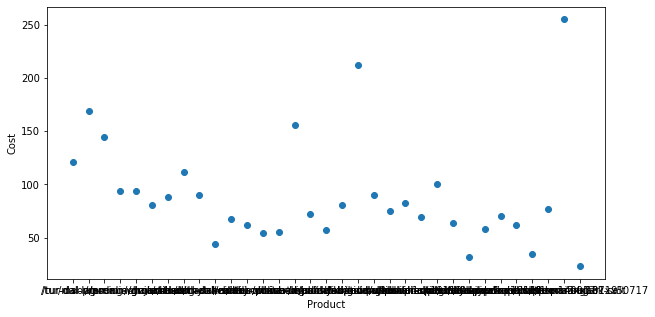

In [42]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df_EDA['DmartProduct'], df_EDA['DProductPrices'])
ax.set_xlabel('Product')
ax.set_ylabel('Cost')
plt.show()

# Bar chart - Relience Fresh - Product count

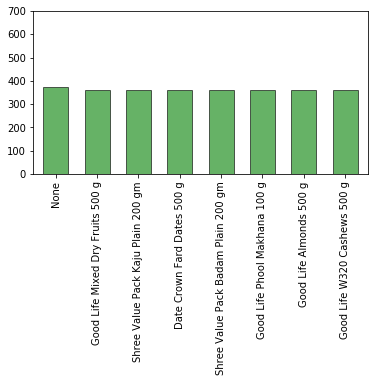

In [43]:
#Relience Fresh -Vegetables, Fruits, Dairy product, Dry fruits
countv = df_EDA['RelVegetables'].value_counts()
countf = df_EDA['RelFruits'].value_counts()
countdp = df_EDA['RelDiary'].value_counts()
countdf = df_EDA['RelDry_Fruits'].value_counts()
s1 = sum(countv,countf)
s2 = sum(countdp,countdf)
fs = sum(s1,s2)
ax = fs.plot(kind='bar', figsize=[6, 3], width=0.6, alpha=0.6, color='g', edgecolor='k', grid=False, ylim=[0, 700])

# Bar chart - Jio Mart - Product count


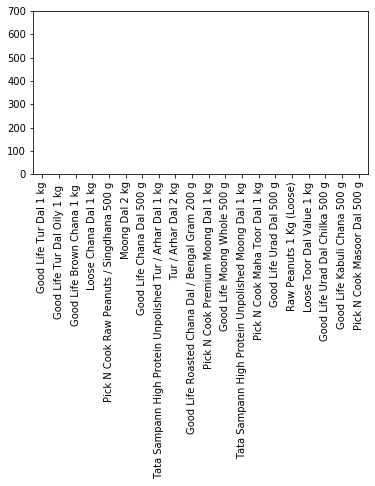

In [44]:
#Jio Mart - Product
countjdf = df_EDA['JioProduct'].value_counts()
ax = countjdf.plot(kind='bar', figsize=[6, 3], width=0.6, alpha=0.6, color='g', edgecolor='k', grid=False, ylim=[0, 700])

# Bar chart - DMart - Product count

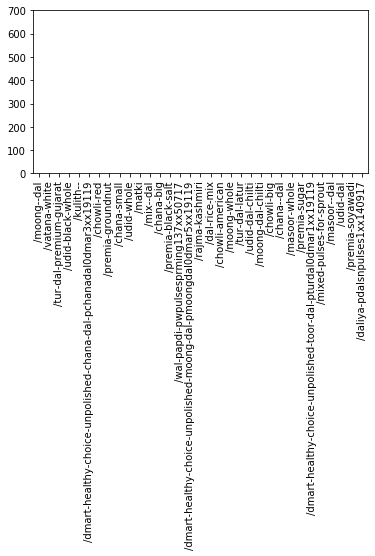

In [45]:
#DMart - Product
countddf = df_EDA['DmartProduct'].value_counts()
ax = countddf.plot(kind='bar', figsize=[6, 3], width=0.6, alpha=0.6, color='g', edgecolor='k', grid=False, ylim=[0, 700])

# Histogram - Count - Products

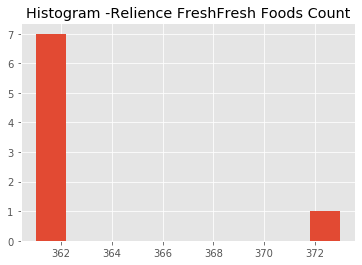

In [46]:
#Histogram - Count -Relience Fresh
s1 = sum(countv,countf)
s2 = sum(countdp,countdf)
fs = sum(s1,s2)
fs

bins = 10
plt.style.use('ggplot')
plt.title('Histogram -Relience FreshFresh Foods Count')
plt.hist(fs,bins)
plt.show()

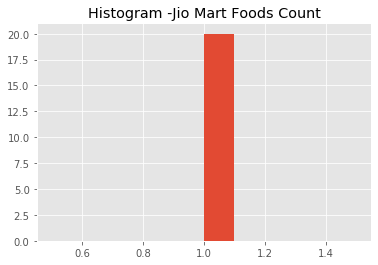

In [47]:
#Histogram - Count -Jio Mart
bins = 10
plt.style.use('ggplot')
plt.title('Histogram -Jio Mart Foods Count')
plt.hist(countjdf,bins)
plt.show()


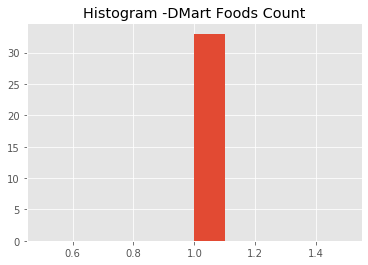

In [48]:
#Histogram - Count -DMart
bins = 10
plt.style.use('ggplot')
plt.title('Histogram -DMart Foods Count')
plt.hist(countddf,bins)
plt.show()

# EDA - Ends